## Linear Regression can be used to estimate the price of the real estate property with the variation of the size.
### Statsmodel library is used to analyse the dataset

In [1]:
# import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
# load the dataset
real_estate_data=pd.read_csv('real_estate_price_size.csv')

In [3]:
# explore the data
real_estate_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
real_estate_data.describe(include='all')

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [5]:
# From the theory of linear regression it can be seen that price is the dependent variable and size is the independent variable
y=real_estate_data['price']
x=real_estate_data['size']

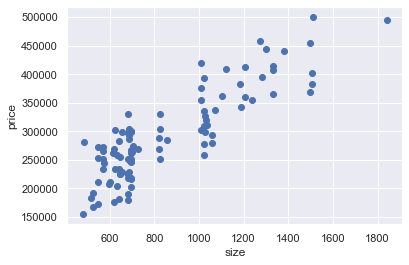

In [6]:
# Explore the data through plots
plt.scatter(x,y)
plt.xlabel('size')
plt.ylabel('price')
plt.show()
# It can be seen that the price and size of the property shows a linear relationship

In [7]:
# Now creating a linear regression model
# we create a constant columns of 1s to make the dimensionality even 
x1=sm.add_constant(x)
# Fitting the model using Ordinary Linear Squares(OLS)
model_result=sm.OLS(y,x1).fit()

In [8]:
# exploring the summary generated by this model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           8.13e-31
Time:                        22:43:32   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# This summary cleary depicts that the price of the property is strongly dependent on the size of the property
# The hypothesis is : y_=b+x1*b1    
# As can be seen from the summary table b(intercept)=1.019e+05 and b1=223.1787
# As can be seen from the coefficient table the p value should be less that 0.05 for any variable to be significant
# Here since p value comes out to be 0.000 for the size. Thus, size is the significant variable in determining the price 
# of the property. 

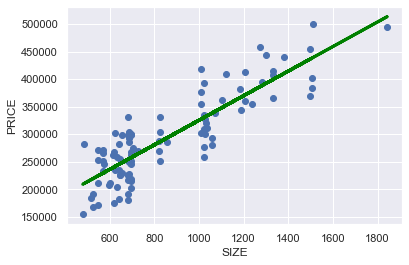

In [10]:
# Fitting the model using matplotlib and seaborn
plt.scatter(x,y)
b0=1.019e+05
b1=223.1787
y_=b0+x*b1  # price=101900+223.1787*size
figure=plt.plot(x,y_ ,linewidth=3, color='green')
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()